# ABCD Strategy

In [896]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

import yfinance as yf

In [897]:
ticker = "INTL"
df = yf.download(ticker)

[*********************100%***********************]  1 of 1 completed


In [898]:
df["Trade_action_price"]=df["Open"].shift(-1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Trade_action_price
Date,,,,,,,
1995-03-06,2.253944,2.253944,2.253944,2.253944,2.253944,1300,1.878287
1995-03-07,1.878287,2.066116,1.878287,1.878287,1.878287,5800,1.878287
1995-03-08,1.878287,1.878287,1.878287,1.878287,1.878287,0,1.878287
1995-03-09,1.878287,1.878287,1.878287,1.878287,1.878287,0,1.878287
1995-03-10,1.878287,1.878287,1.878287,1.878287,1.878287,0,1.878287


In [899]:
#df = df.tail(n=2000)
df = df.head(n=1000)
df.shape

(1000, 7)

In [900]:
def abcd(trend, skip_loop = 4, ma = 7):
    ma = pd.Series(trend).rolling(ma).mean().values
    x = []
    y = []
    if len(trend) < 4:
        len_s = len(trend) +1
        signal = np.zeros(len_s)
        return signal
    for a in range(ma.shape[0]):
        if a%100 == 0: print(a, end='\r')
        for b in range(a, ma.shape[0], skip_loop):
            for c in range(b, ma.shape[0], skip_loop):
                d = ma.shape[0]-1
                if ma[b] > ma[a] and \
                (ma[c] < ma[b] and ma[c] > ma[a]) \
                and ma[d] > ma[b]:
                    x.append([a,b,c,d])

                if ma[b] < ma[a] and \
                (ma[c] > ma[b] and ma[c] < ma[a]) \
                and ma[d] < ma[b]:
                    y.append([a,b,c,d])
    x_np = np.array(x)
    y_np = np.array(y)
    signal = np.zeros(len(trend))
    if(len(x_np)>0):
        ac = x_np[:,0].tolist() + x_np[:,2].tolist()
        bd = x_np[:,1].tolist() + x_np[:,3].tolist()
        ac_set = set(ac)
        bd_set = set(bd)
        sell = list(list(bd_set - ac_set))
        signal[sell] = -1.0
    if(len(y_np)>0):
        ac2 = y_np[:,0].tolist() + y_np[:,2].tolist()
        bd2 = y_np[:,1].tolist() + y_np[:,3].tolist()
        ac_set2 = set(ac2)
        bd_set2 = set(bd2)
        buy = list(list(bd_set2 - ac_set2))
        signal[buy] = signal[buy]+1
    return signal

In [901]:
%%time
signal_combined=[]
i=0
frame = 100
l=[]
for x in range(1,11):
    l.append(x*frame)
for j in l:
    for k in range(i,j):
        if(i<30):
            signal = abcd(df['Close'][i:k])
        else:
            signal = abcd(df['Close'][k-frame:k])
        signal_combined.append(signal[-1])
    i=j
signal2=signal_combined.copy()
signal=signal_combined.copy()
for i,val in enumerate(signal2):    
    if(i>0):
        if signal2[i-1]==signal2[i]:
            signal[i]=0
print(signal)


[0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [902]:
print(signal.count(1))
print(signal.count(-1))

22
15


In [903]:
def buy_stock(
    real_movement,
    signal
):
    states_sell = []
    states_buy = []
    profit_percentage = 0
    current_inventory = 0
    
    def buy(i, current_inventory):
        if current_inventory == 0:
            current_inventory = 1
            print(
                'day %d: buy 1 unit at price %f'
                % (i,  real_movement[i])
            )
        return current_inventory
    
    for i in range(real_movement.shape[0]):
        state = signal[i]
        if state == 1 and current_inventory == 0:
            current_inventory = buy(i, current_inventory)
            states_buy.append(i)
        elif state == -1 and current_inventory > 0:
            current_inventory = 0
            total_sell =  real_movement[i]
            try:
                invest = (
                    (real_movement[i] - real_movement[states_buy[-1]])
                    / real_movement[states_buy[-1]]
                ) * 100
            except:
                invest = 0
            print(
                'day %d, sell 1 units at price %f, profit %f %%'
                % (i, total_sell, round(invest,1))
            )
            profit_percentage += invest
            states_sell.append(i)
        
    return states_buy, states_sell, profit_percentage

In [904]:
states_buy, states_sell, profit_percentage = buy_stock(df.Close.values, signal)

day 82: buy 1 unit at price 1.972201
day 118, sell 1 units at price 2.253944, profit 14.300000 %
day 213: buy 1 unit at price 1.878287
day 259, sell 1 units at price 2.817430, profit 50.000000 %
day 365: buy 1 unit at price 3.005259
day 545, sell 1 units at price 2.160030, profit -28.100000 %
day 549: buy 1 unit at price 2.160030
day 568, sell 1 units at price 2.535687, profit 17.400000 %
day 693: buy 1 unit at price 3.287002
day 960, sell 1 units at price 1.549587, profit -52.900000 %
day 967: buy 1 unit at price 1.136364
day 983, sell 1 units at price 2.014463, profit 77.300000 %


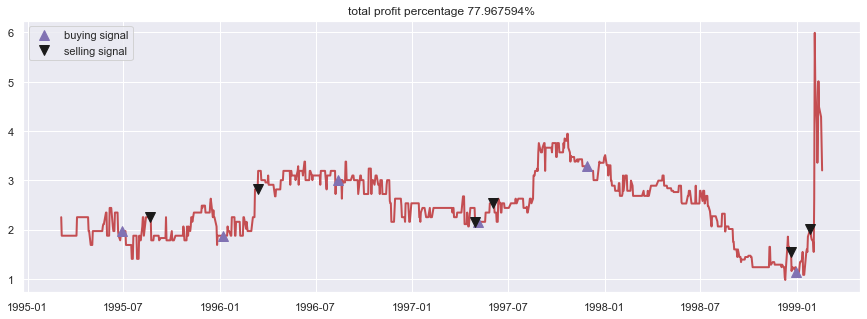

In [905]:
close = df['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total profit percentage %f%%'%(profit_percentage))
plt.legend()
plt.show()

In [906]:
buy=[]
buy_time=[]
i=0
trade_profit=[]
trade_length=[]
for val in signal:
    if val==1:
        buy.append(df["Trade_action_price"][i])  
        buy_time.append(i)
    if val==-1 and len(buy)>0:
        buy_price=buy.pop(0)
        profit=df["Trade_action_price"][i]-buy_price
        trade_profit.append(profit/buy_price)
        trade_length.append(i-buy_time.pop(0))
    i+=1
print("Trade count: ", len(trade_profit))

Trade count:  12


/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Trade length')

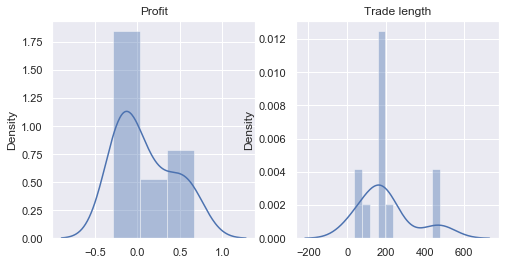

In [907]:
fig,axes=plt.subplots(1,2)
sns.distplot(trade_profit,ax=axes[0])
sns.distplot(trade_length,ax=axes[1])
axes[0].set_title("Profit")
axes[1].set_title("Trade length")